<a href="https://colab.research.google.com/github/mk-armah/Nvidia-SDC-research-2016/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib

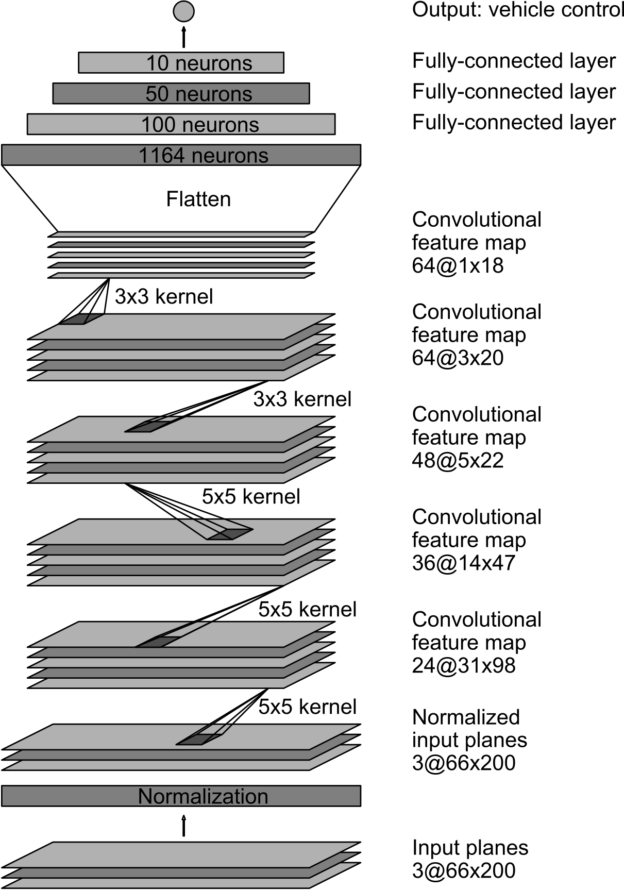

In [ ]:
Image.open("/content/nvidea-end to end learning for self driving cars - archticture.png")

In [ ]:
urllib.request.urlretrieve("https://i0.wp.com/syncedreview.com/wp-content/uploads/2017/02/image-32.png?resize=624%2C335&ssl=1","link")

('link', <http.client.HTTPMessage at 0x7ff1a62c3510>)

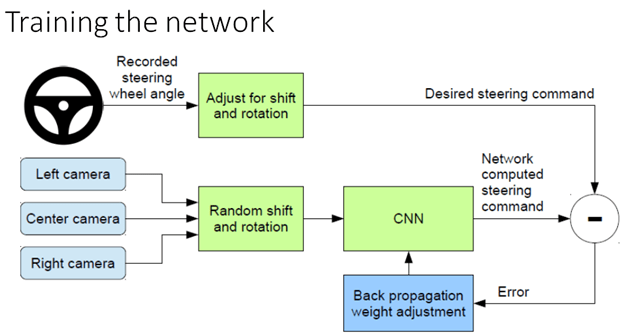

In [ ]:
Image.open("link")

In [1]:
%%writefile model.py

class NvidiaModel(tf.keras.Model):
  def __init__(self):
    super(NvidiaModel,self).__init__()
    self.conv2d = tf.keras.Sequential((tf.keras.layers.BatchNormalization(input_shape = (66,200,3)),
                      
                        tf.keras.layers.Conv2D(filters = 24, kernel_size = (5,5), strides = (2,2), padding = 'valid', activation = "relu"),
                        tf.keras.layers.Conv2D(filters = 36, kernel_size = (5,5), strides = (2,2), padding = 'valid', activation = 'relu'),
                        tf.keras.layers.Conv2D(filters = 48, kernel_size = (5,5), strides = (2,2), padding = 'valid', activation = 'relu'),
                        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'),
                        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'),
                        ))
    self.maxpool = tf.keras.layers.MaxPool2D(pool_size=(2,2))
    
    self.Flatten = tf.keras.layers.Flatten()
    self.fc = tf.keras.Sequential()
    self.fc.add(tf.keras.layers.Dense(1164))
    self.fc.add(tf.keras.layers.Dense(100))
    self.fc.add(tf.keras.layers.Dense(10))
    
  def call(self,image):
    image = self.conv2d(image)
    image =self.maxpool(image)
    image = self.Flatten(image)
    output = self.fc(image)

    return output

Writing model.py


In [ ]:
model = NvidiaModel()

In [ ]:
input_ = np.random.randn(1,66,200,3) #initialize a random input 
model(input_)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
model.summary(expand_nested = True)

Model: "nvidia_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1, 18, 64)         131360    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| batch_normalization (BatchN  (None, 66, 200, 3)     12        |
| ormalization)                                                 |
|                                                               |
| conv2d (Conv2D)           (None, 31, 98, 24)        1824      |
|                                                               |
| conv2d_1 (Conv2D)         (None, 14, 47, 36)        21636     |
|                                                               |
| conv2d_2 (Conv2D)         (None, 5, 22, 48)         43248     |
|                                                               |
| conv2d_3 (Conv2D)         (None, 3, 20, 64)         27712     |
|                                                     